In [1]:
from src.data.data_handler import MiniBooNEDataHandler
from src.plotter import NeutrinoPlotter

handler = MiniBooNEDataHandler()
plotter = NeutrinoPlotter()

| 2025-12-06 20:10:40,051 | INFO     | root                         | ================================================================================
| 2025-12-06 20:10:40,052 | INFO     | root                         | Logging initialized from: /home/mchadolias/projects/miniboone-classification/src/config/logging.yaml
| 2025-12-06 20:10:40,053 | INFO     | root                         | Logs directory: /home/mchadolias/projects/miniboone-classification/logs
| 2025-12-06 20:10:40,053 | INFO     | root                         | ================================================================================
| 2025-12-06 20:10:41,004 | INFO     | src.data.data_handler        | MiniBooNEDataHandler initialized.
| 2025-12-06 20:10:41,190 | INFO     | src.styles.plot_style        | Using scienceplots style with LaTeX rendering
| 2025-12-06 20:10:41,191 | INFO     | src.plotter.base_plotter     | ScientificPlotter initialized with style: 'science'


## Import Dataset & Cleaning

In [2]:
df = handler.load()

| 2025-12-06 20:10:41,201 | INFO     | src.data.data_handler        | Loading dataset directly from ../data/external/MiniBooNE_PID.csv
| 2025-12-06 20:10:41,202 | INFO     | src.data.data_loader         | Loading MiniBooNE data from ../data/external/MiniBooNE_PID.csv...
| 2025-12-06 20:10:41,822 | INFO     | src.data.data_loader         | Loaded 130,064 rows, 51 columns (50 features + 1 target).
| 2025-12-06 20:10:41,823 | INFO     | src.data.data_loader         | Signal events: 36,499
| 2025-12-06 20:10:41,824 | INFO     | src.data.data_loader         | Background events: 93,565


In [3]:
splits = handler.process()

| 2025-12-06 20:10:41,874 | INFO     | src.data.data_handler        | Starting data cleaning...
| 2025-12-06 20:10:42,092 | INFO     | src.data.data_cleaner        | Removed 466 duplicated events from dataset.
| 2025-12-06 20:10:42,115 | INFO     | src.data.data_cleaner        | Detected 100 sentinel (-999) entries; replacing with NaN.
| 2025-12-06 20:10:42,140 | INFO     | src.data.data_cleaner        | Detected 100 missing entries across 50 columns.
| 2025-12-06 20:10:42,431 | INFO     | src.data.data_cleaner        | All missing values successfully imputed with column medians.
| 2025-12-06 20:10:42,694 | INFO     | src.data.data_cleaner        | Feature Scaling Recommendations Summary:
| 2025-12-06 20:10:42,695 | INFO     | src.data.data_cleaner        |  - linear: 19 features
| 2025-12-06 20:10:42,696 | INFO     | src.data.data_cleaner        |    Examples: feature_0, feature_1, feature_3 with ranges 0.0e+00 to 1.7e+01, 6.0e-02 to 8.8e+00, 1.0e-01 to 7.4e-01
| 2025-12-06 20:10:42,6

In [4]:
handler.get_data_summary()

{'total_samples': 129598,
 'signal_count': 36489,
 'background_count': 93109,
 'signal_ratio': 0.2815552709146746,
 'feature_count': 50,
 'missing_values': 0}

In [5]:
# Final dataframe 
df = handler.df

## EDA

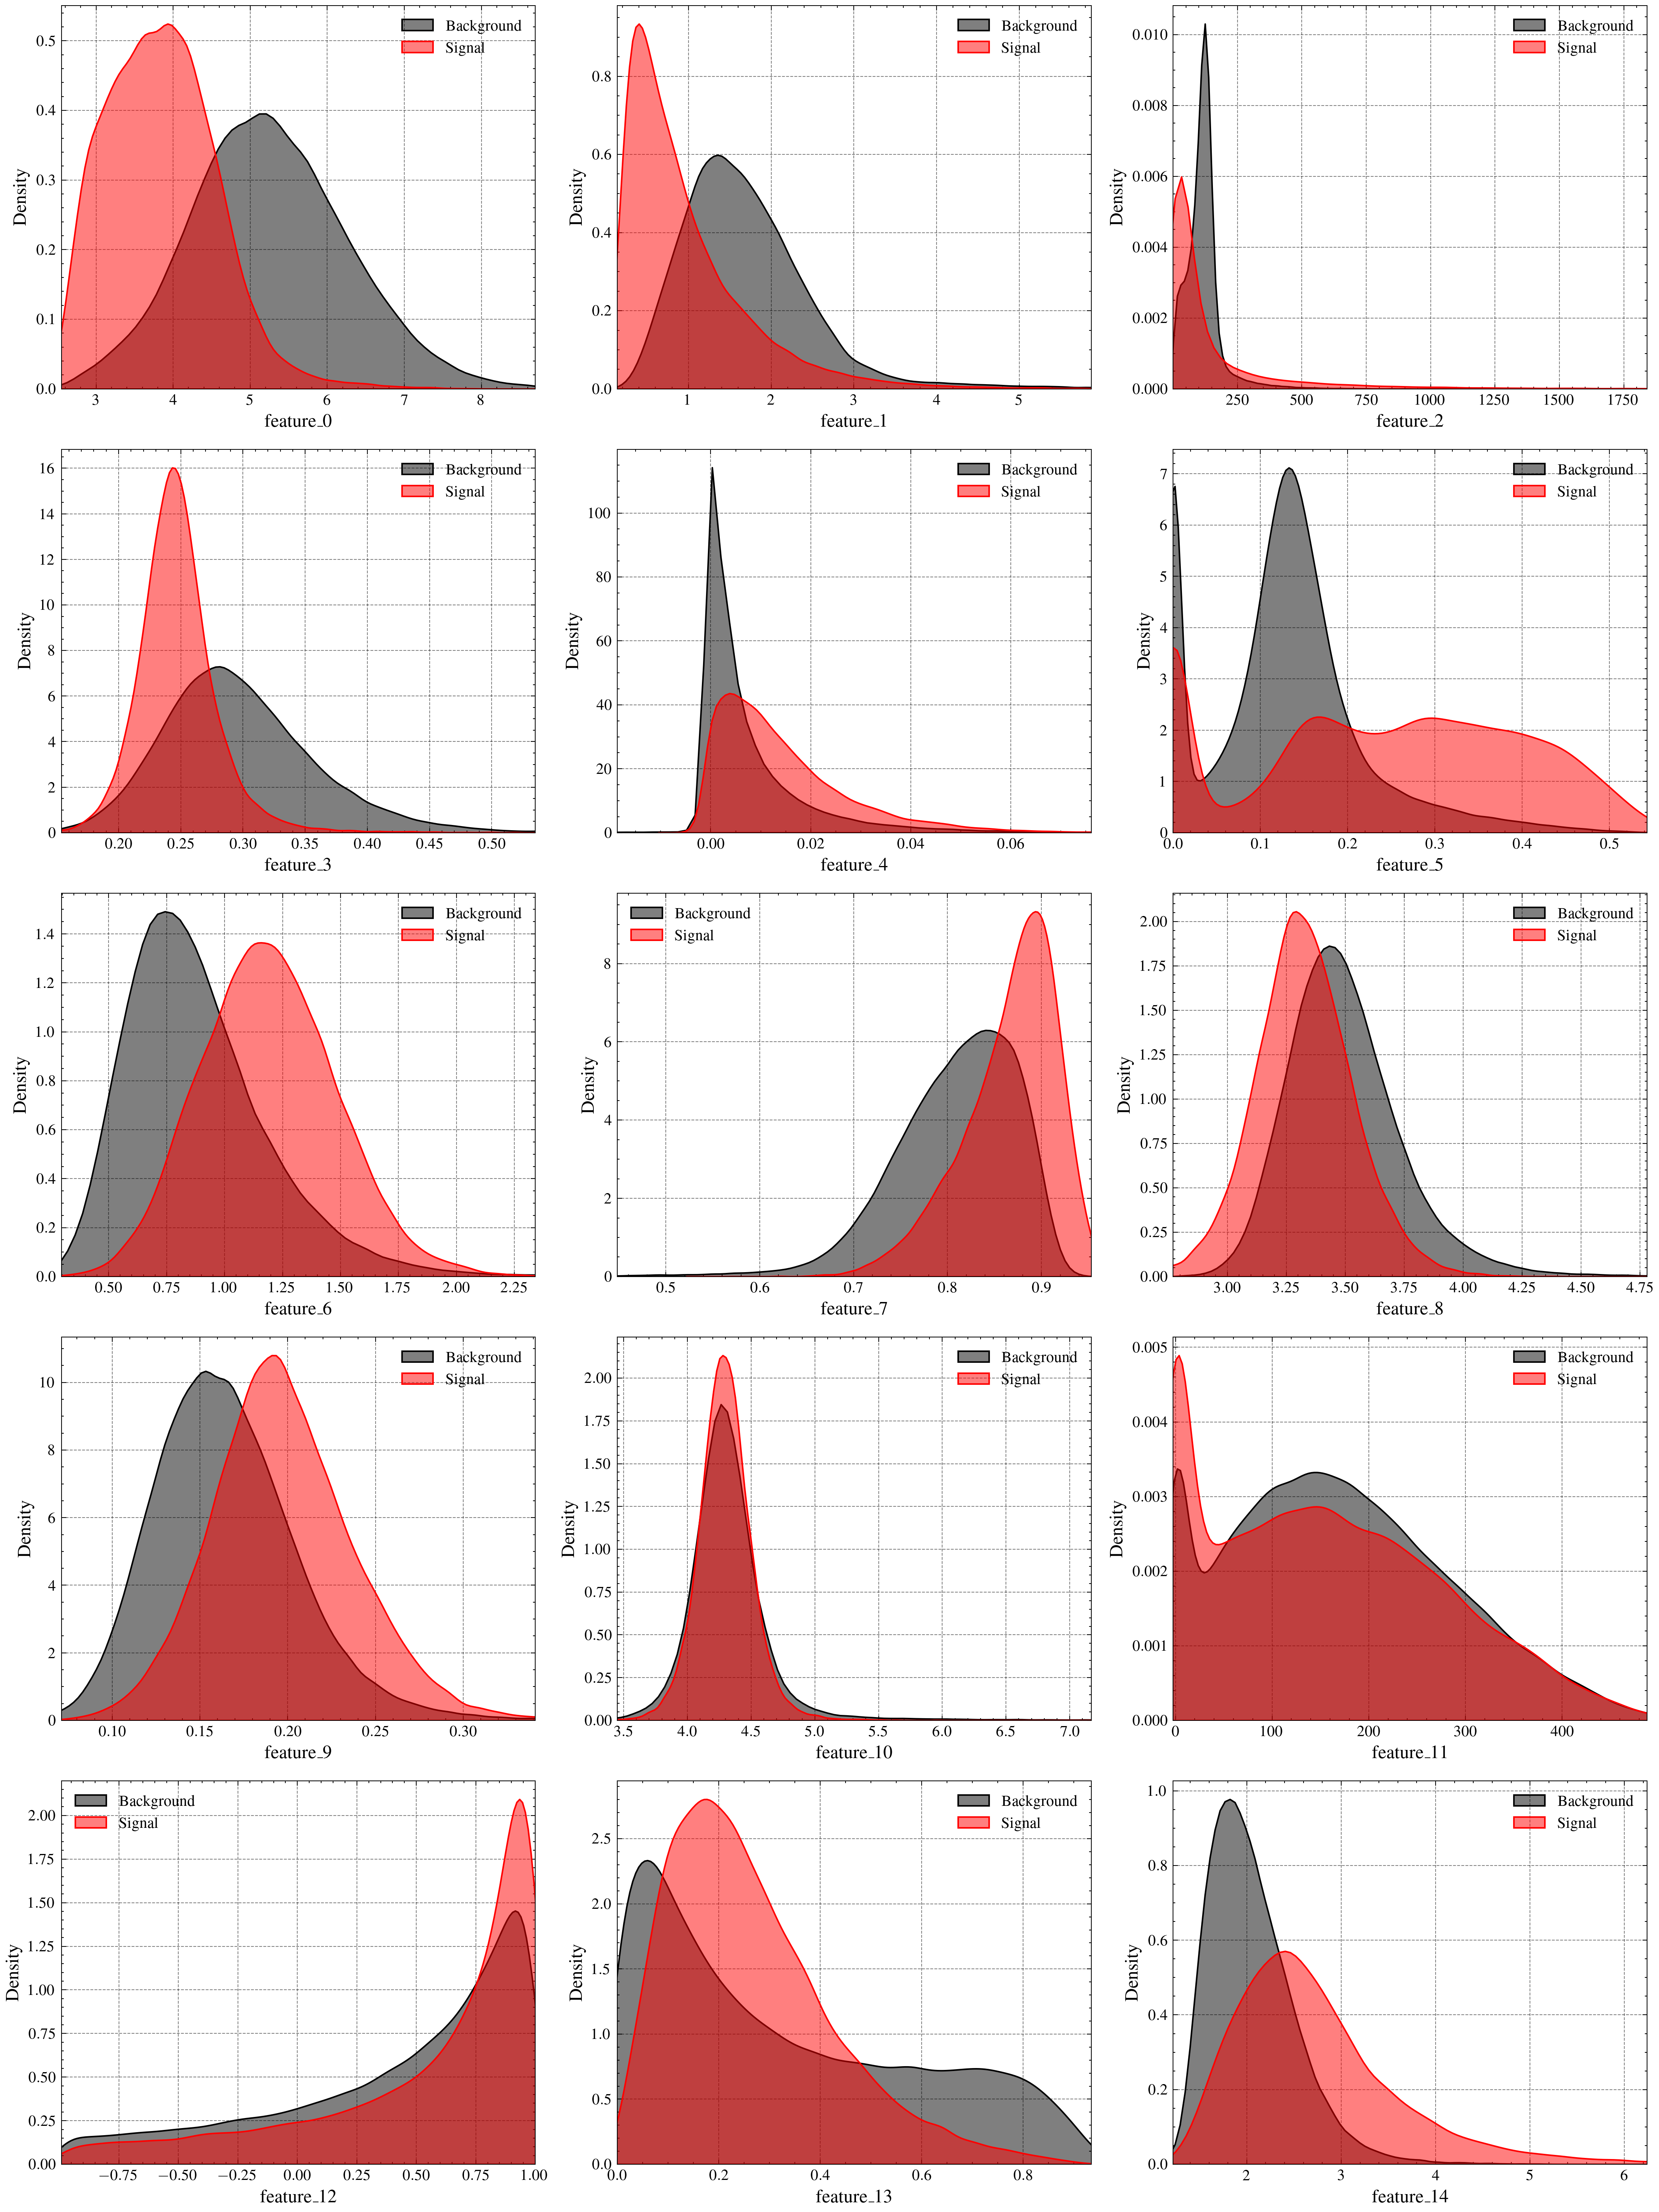

In [6]:
fig_feat_sep = plotter.plot_feature_separation(df, [f"feature_{i}" for i in range(15)], x_axis_trim_percentiles=(0.2, 99.8), annotate_stats=False)

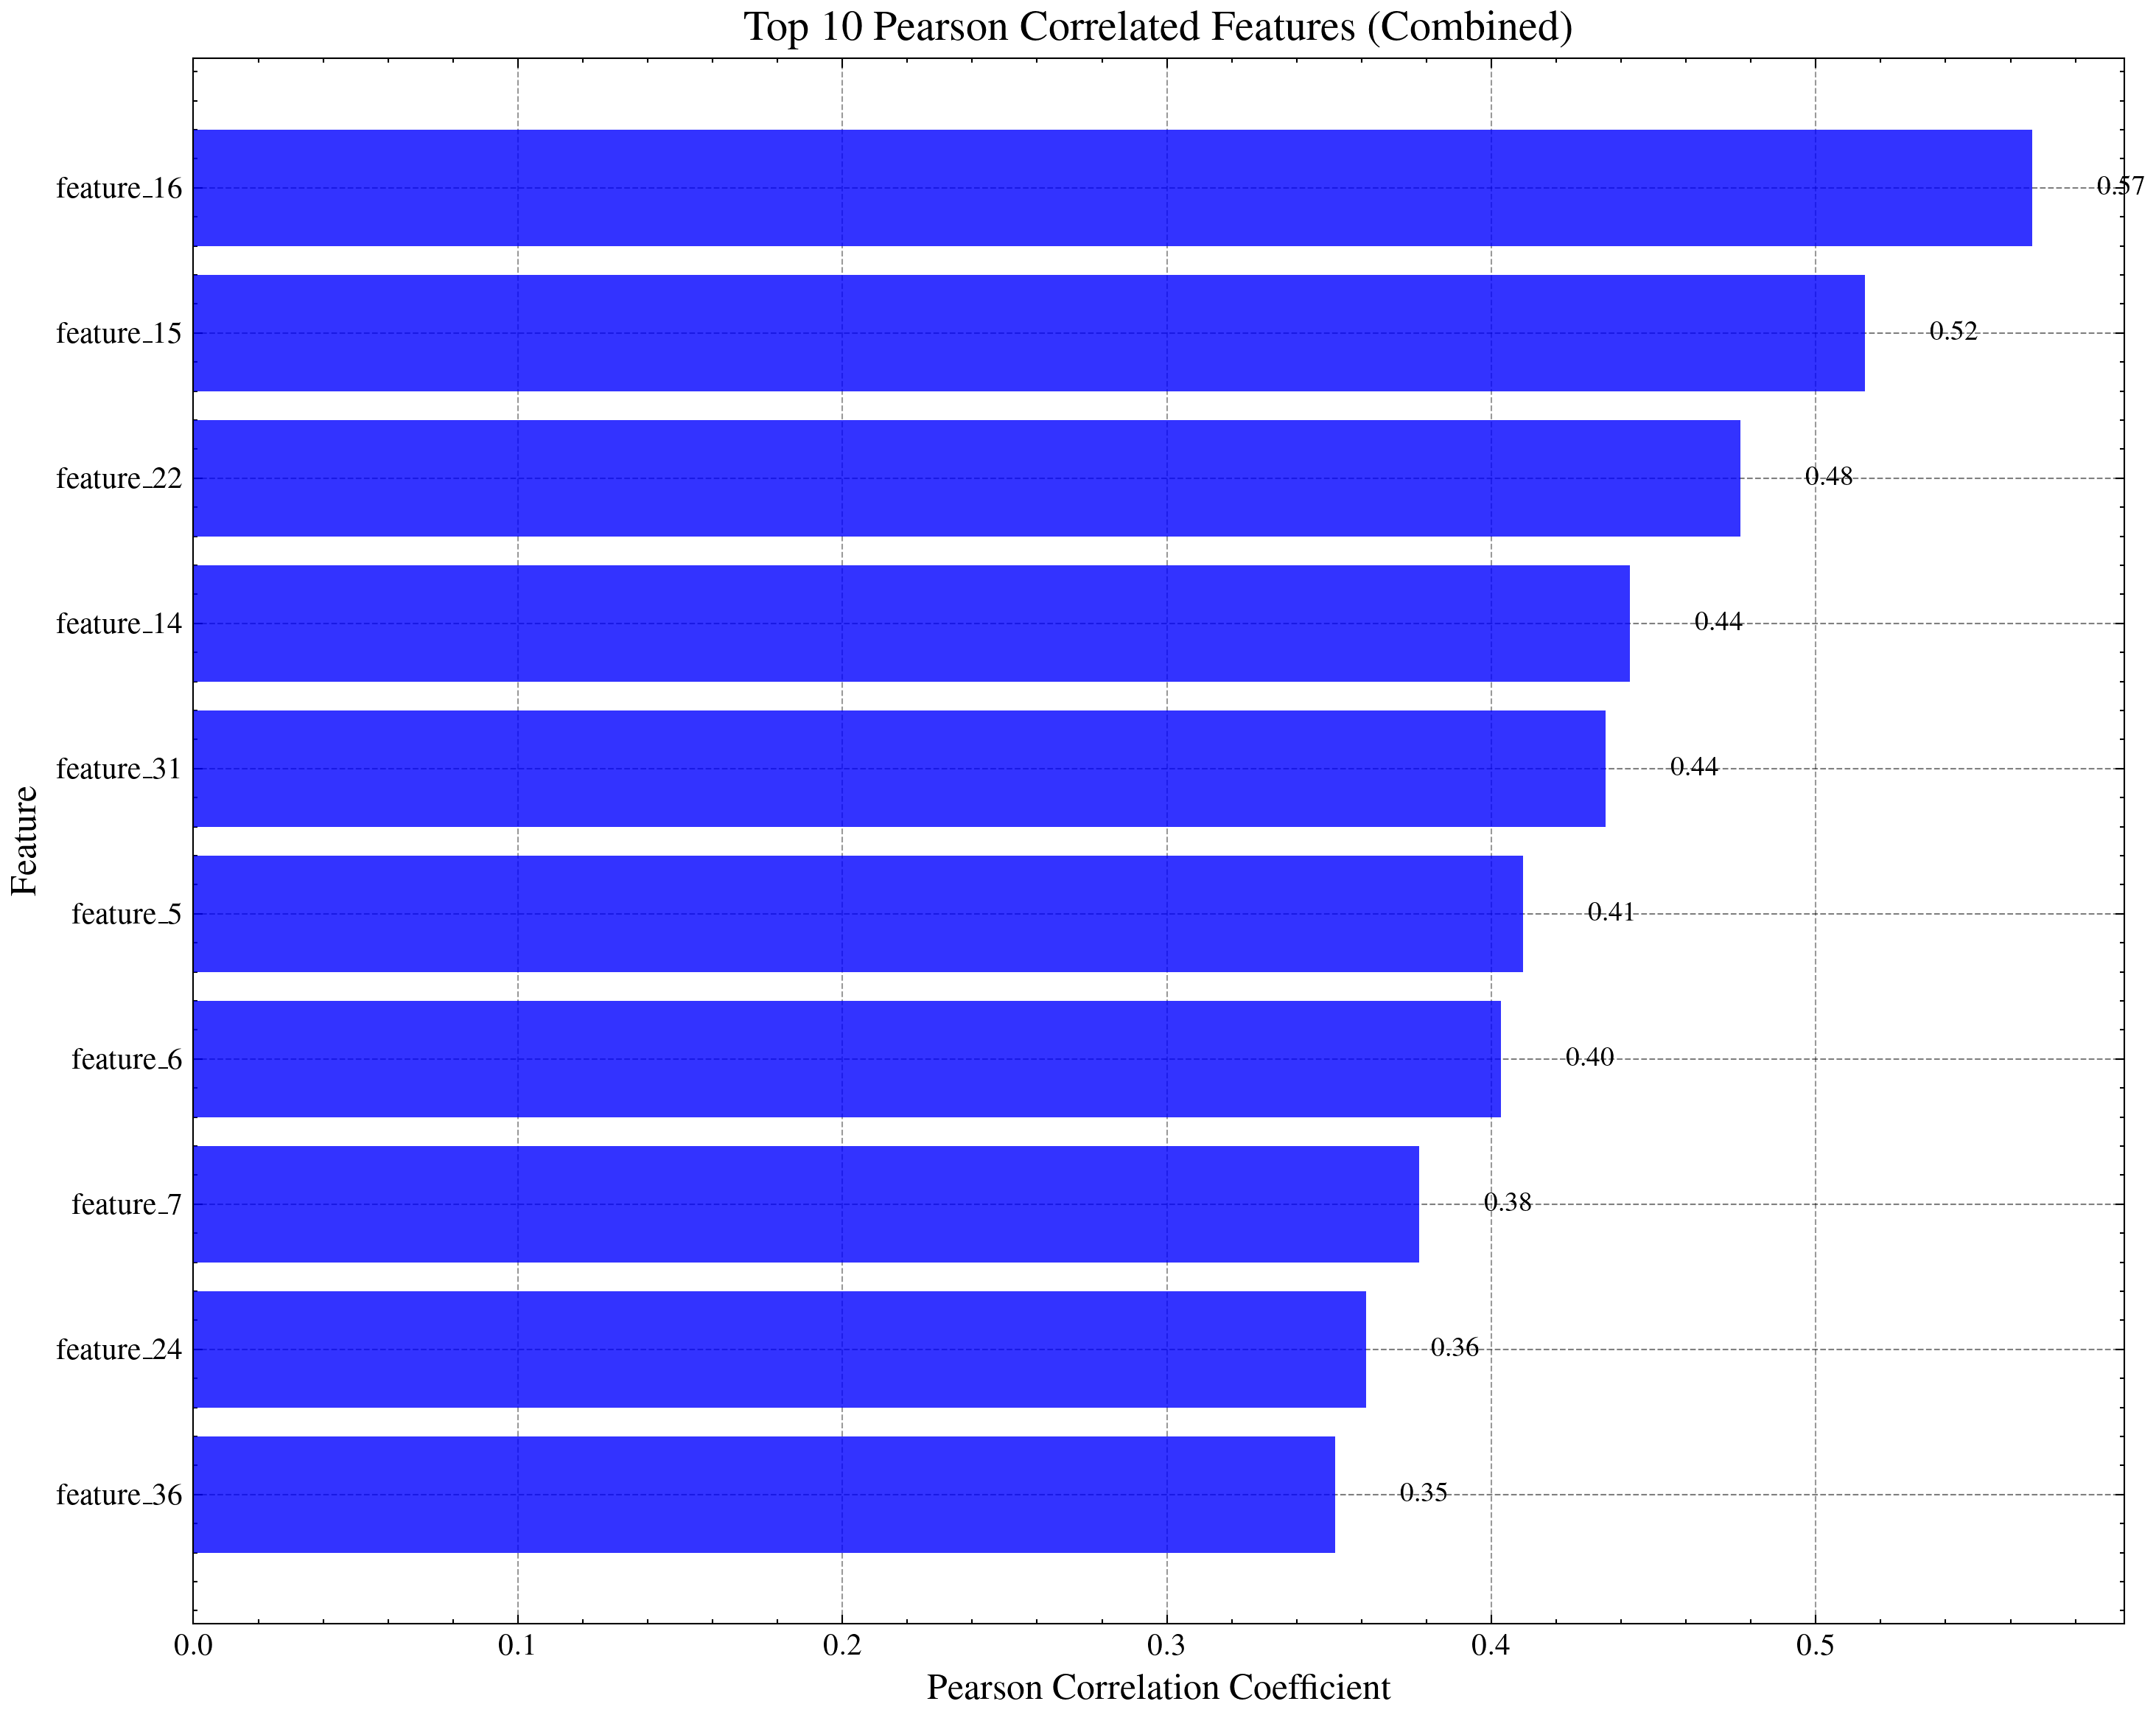

In [7]:
fig = plotter.plot_top_correlations(df, positive_only=True)

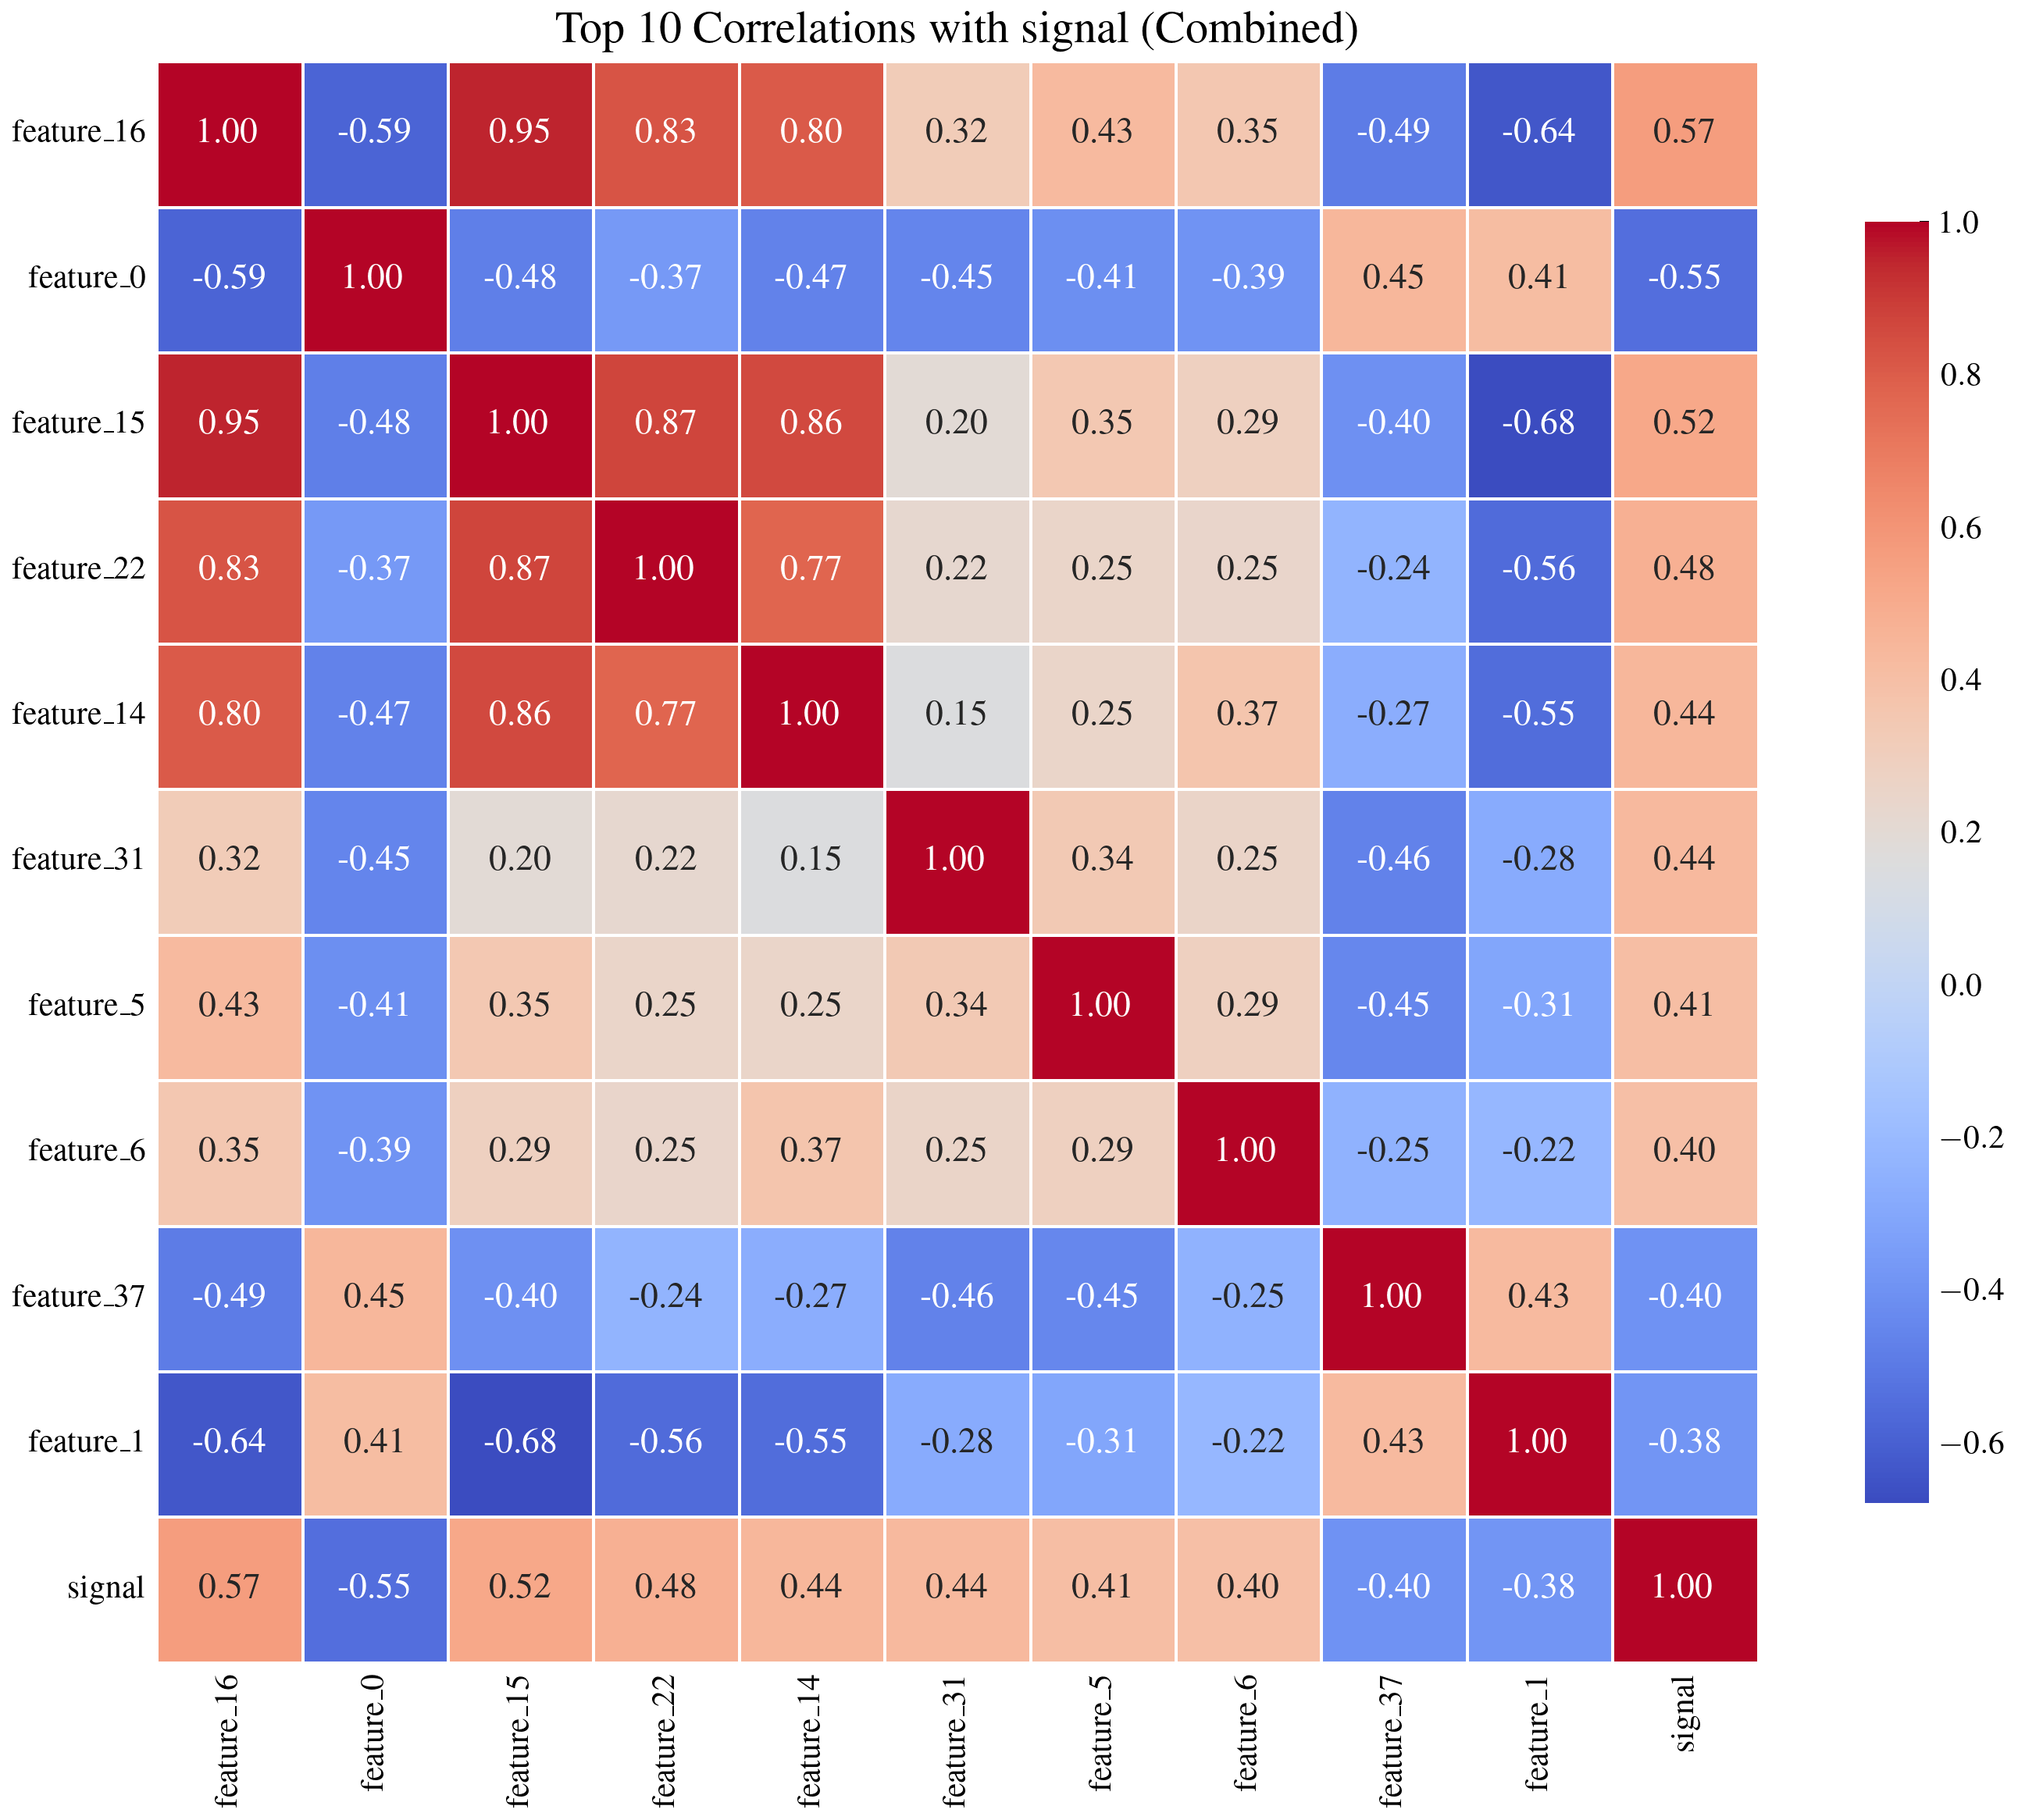

In [8]:
fig_map = plotter.plot_top_correlation_heatmap(df, top_n=10)

/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


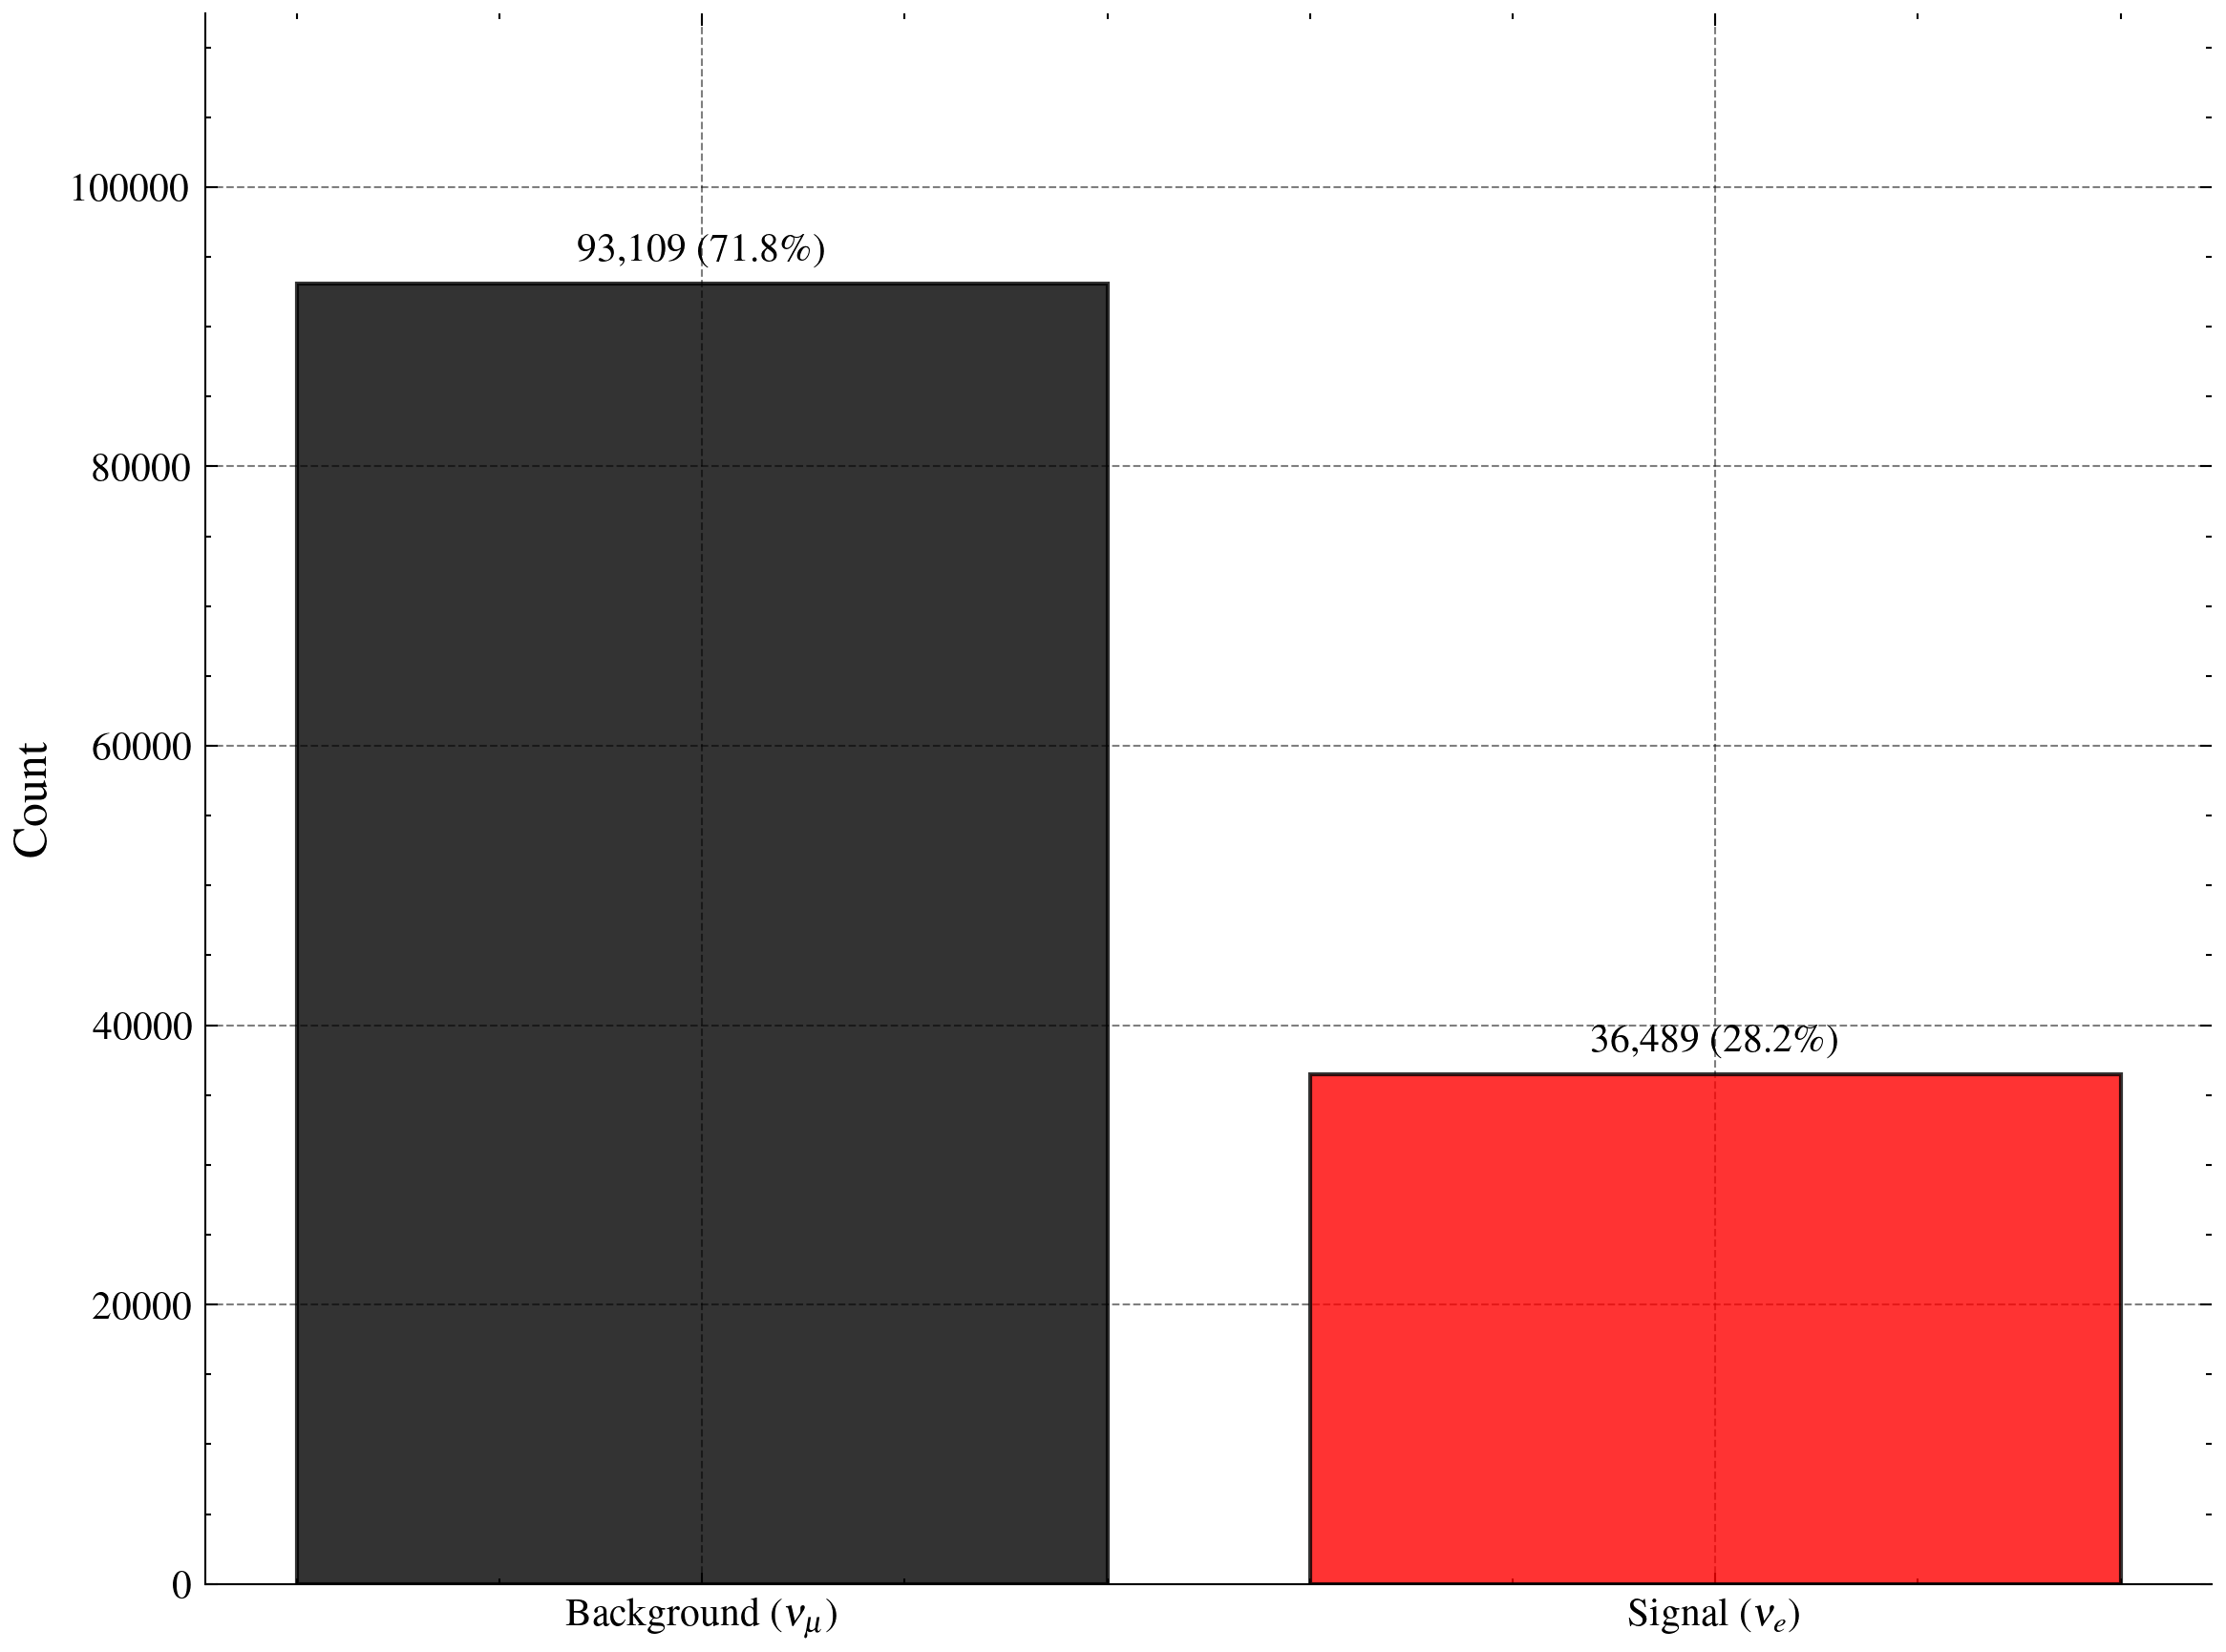

In [9]:
fig_target = plotter.plot_target_distribution(df, how_legend=True, n_boot=0)